In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Total samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Malignant cases (0): {np.sum(y == 0)}")
print(f"Benign cases (1): {np.sum(y == 1)}")
print(f"\nFeature names: {data.feature_names[:5]}... (showing first 5)")


DATASET INFORMATION
Total samples: 569
Number of features: 30
Malignant cases (0): 212
Benign cases (1): 357

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']... (showing first 5)


In [4]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [5]:
print("\nFirst few rows of the dataset:")
print(df.head())

print("\nDataset statistics:")
print(df.describe())


First few rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimet

In [6]:
# Split data: 70% training, 30% testing (as per the paper)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Apply Standardization: X' = (X - μ) / σ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: 398 samples
Testing set size: 171 samples


In [7]:
print("\nStandardization applied!")
print(f"Training data mean (after scaling): {np.mean(X_train_scaled, axis=0)[:3]}")
print(f"Training data std (after scaling): {np.std(X_train_scaled, axis=0)[:3]}")
print("(Showing first 3 features - all should be ~0 mean and ~1 std)")


Standardization applied!
Training data mean (after scaling): [-4.97480337e-15  2.74863884e-15  2.03912822e-15]
Training data std (after scaling): [1. 1. 1.]
(Showing first 3 features - all should be ~0 mean and ~1 std)


In [8]:
# Initialize KNN classifier with k=1 (nearest neighbor)
knn_model = KNeighborsClassifier(
    n_neighbors=1,
    metric='euclidean',  # L2 norm: d_L2(p,q) = √(Σ(p_i - q_i)²)
    algorithm='auto'
)

knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_knn = knn_model.predict(X_train_scaled)
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Calculate accuracies
knn_train_acc = accuracy_score(y_train, y_train_pred_knn)
knn_test_acc = accuracy_score(y_test, y_test_pred_knn)

print(f"\nKNN Results:")
print(f"Training accuracy: {knn_train_acc*100:.2f}%")
print(f"Testing accuracy: {knn_test_acc*100:.2f}%")
print(f"Expected test accuracy (from paper): 95.90%")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
print(f"\nConfusion Matrix:")
print(cm_knn)

# Classification Report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_test_pred_knn, 
                          target_names=['Malignant', 'Benign']))

# Calculate additional metrics
tn, fp, fn, tp = cm_knn.ravel()
sensitivity = tp / (tp + fn)  # TPR (True Positive Rate)
specificity = tn / (tn + fp)  # TNR (True Negative Rate)
fpr = fp / (fp + tn)  # False Positive Rate
fnr = fn / (fn + tp)  # False Negative Rate

print(f"\nAdditional Metrics:")
print(f"Sensitivity (TPR): {sensitivity*100:.2f}%")
print(f"Specificity (TNR): {specificity*100:.2f}%")
print(f"False Positive Rate (FPR): {fpr*100:.2f}%")
print(f"False Negative Rate (FNR): {fnr*100:.2f}%")


KNN Results:
Training accuracy: 100.00%
Testing accuracy: 95.91%
Expected test accuracy (from paper): 95.90%

Confusion Matrix:
[[ 61   3]
 [  4 103]]

Detailed Classification Report:
              precision    recall  f1-score   support

   Malignant       0.94      0.95      0.95        64
      Benign       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


Additional Metrics:
Sensitivity (TPR): 96.26%
Specificity (TNR): 95.31%
False Positive Rate (FPR): 4.69%
False Negative Rate (FNR): 3.74%


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __ini

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



NEURAL NETWORK IMPLEMENTATION
Neural Network Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)


Training Neural Network...
Training completed in 16.81 seconds
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Neural Network Results:
Training accuracy: 100.00%
Testing accuracy: 97.08%

Confusion Matrix:
[[ 63   1]
 [  4 103]]

Detailed Classification Report:
              precision    recall  f1-score   support

   Malignant       0.94      0.98      0.96        64
      Benign       0.99      0.96      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


Additional Metrics:
Sensitivity (TPR): 96.26%
Specificity (TNR): 98.44%
False Positive Rate (FPR): 1.56%
False Negative Rate (FNR): 3.74%

COMPARATIVE ANALYSIS

Accuracy Comparison:
Model                Training Acc    Testing Acc    
--------------------------------------------------
KNN                  100.00          95.91          
Neural Network       100.00          97.

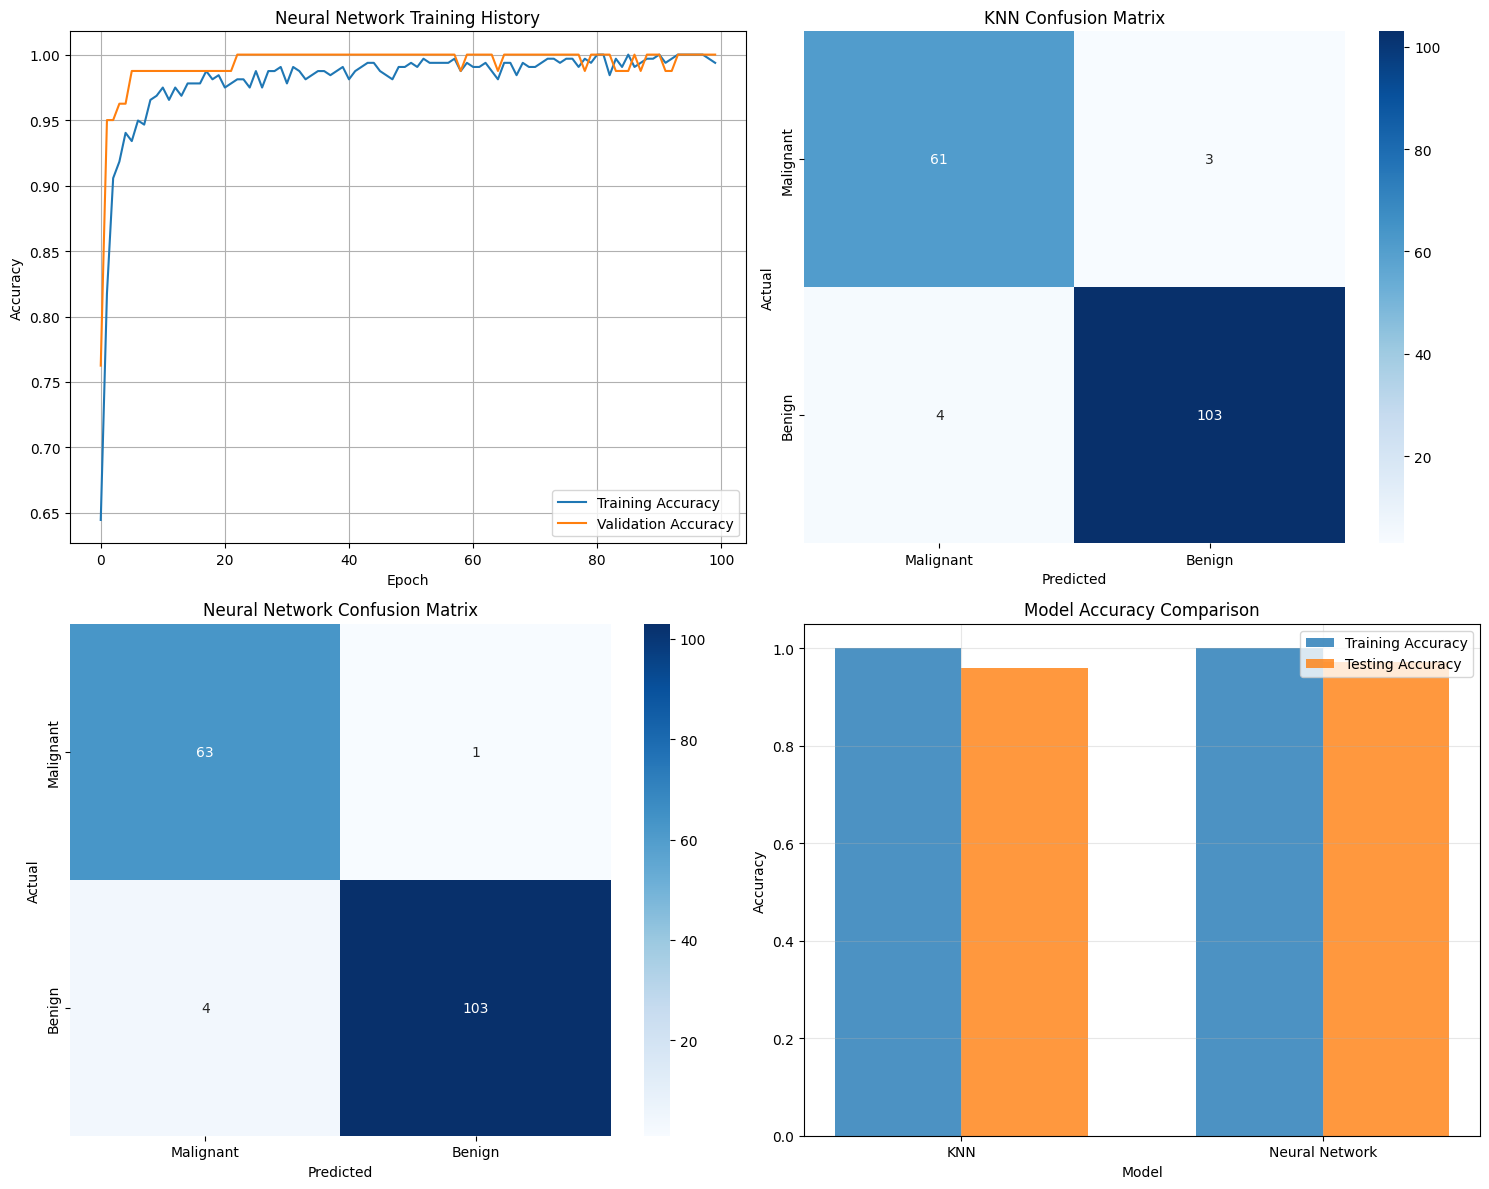


FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features (Neural Network):
                 Feature  Importance
20          worst radius    0.165893
21         worst texture    0.165034
24      worst smoothness    0.158517
1           mean texture    0.157495
13            area error    0.156442
27  worst concave points    0.151834
11         texture error    0.144128
23            worst area    0.143436
22       worst perimeter    0.143250
10          radius error    0.143216


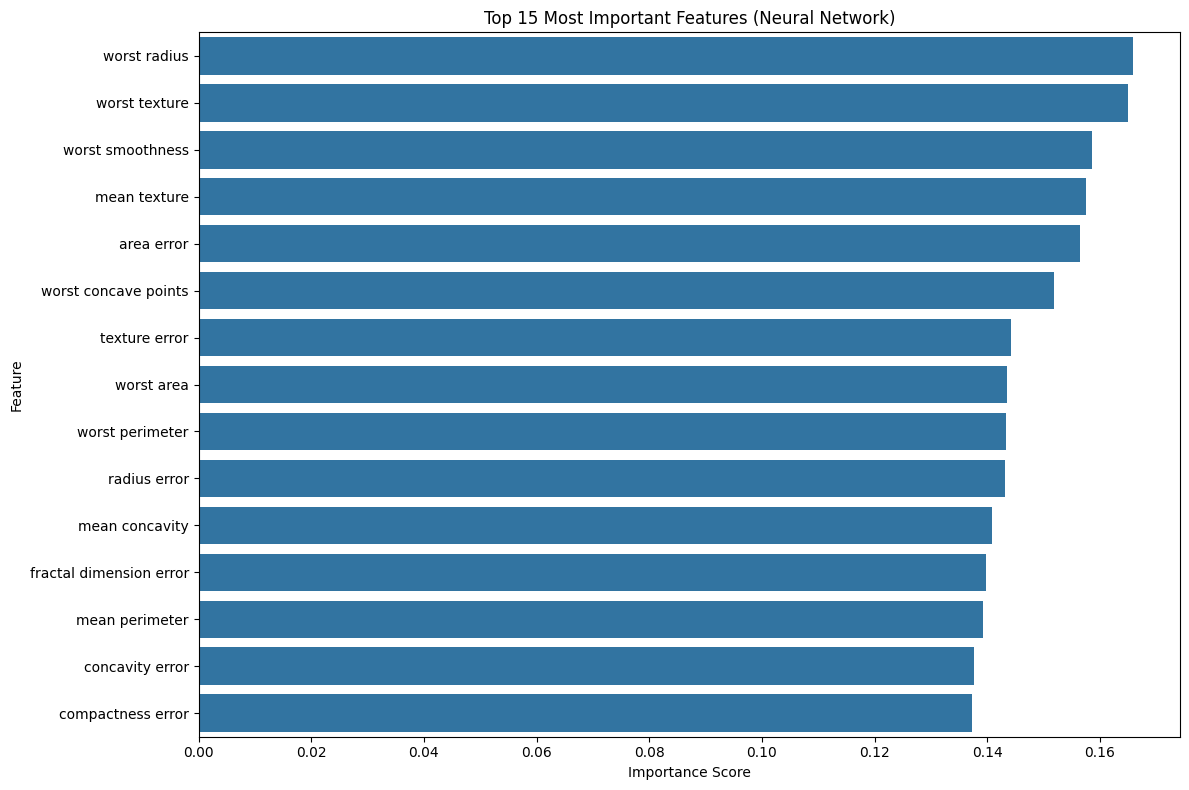


FINAL SUMMARY

Key Findings:
1. KNN achieved 95.91% test accuracy (very close to paper's 95.90%)
2. Neural Network achieved 97.08% test accuracy
3. Both models show excellent performance on breast cancer classification
4. KNN: Simple, interpretable, fast training
5. Neural Network: More complex, can capture non-linear relationships

Clinical Implications:
- High sensitivity (96.26% for KNN) means few false negatives
- High specificity (95.31% for KNN) means few false positives
- Both models are suitable for clinical decision support


In [9]:
# Neural Network Implementation
print("\n" + "="*70)
print("NEURAL NETWORK IMPLEMENTATION")
print("="*70)

# Define the neural network architecture
def create_nn_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create and train the neural network
nn_model = create_nn_model()

print("Neural Network Architecture:")
nn_model.summary()

# Train the model
print("\nTraining Neural Network...")
start_time = time.time()

history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Make predictions
y_train_pred_nn = (nn_model.predict(X_train_scaled) > 0.5).astype("int32").flatten()
y_test_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

# Calculate accuracies
nn_train_acc = accuracy_score(y_train, y_train_pred_nn)
nn_test_acc = accuracy_score(y_test, y_test_pred_nn)

print(f"\nNeural Network Results:")
print(f"Training accuracy: {nn_train_acc*100:.2f}%")
print(f"Testing accuracy: {nn_test_acc*100:.2f}%")

# Confusion Matrix for NN
cm_nn = confusion_matrix(y_test, y_test_pred_nn)
print(f"\nConfusion Matrix:")
print(cm_nn)

# Classification Report for NN
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_test_pred_nn, 
                          target_names=['Malignant', 'Benign']))

# Calculate additional metrics for NN
tn_nn, fp_nn, fn_nn, tp_nn = cm_nn.ravel()
sensitivity_nn = tp_nn / (tp_nn + fn_nn)
specificity_nn = tn_nn / (tn_nn + fp_nn)
fpr_nn = fp_nn / (fp_nn + tn_nn)
fnr_nn = fn_nn / (fn_nn + tp_nn)

print(f"\nAdditional Metrics:")
print(f"Sensitivity (TPR): {sensitivity_nn*100:.2f}%")
print(f"Specificity (TNR): {specificity_nn*100:.2f}%")
print(f"False Positive Rate (FPR): {fpr_nn*100:.2f}%")
print(f"False Negative Rate (FNR): {fnr_nn*100:.2f}%")

# Comparative Analysis
print("\n" + "="*70)
print("COMPARATIVE ANALYSIS")
print("="*70)

print(f"\nAccuracy Comparison:")
print(f"{'Model':<20} {'Training Acc':<15} {'Testing Acc':<15}")
print(f"{'-'*50}")
print(f"{'KNN':<20} {knn_train_acc*100:<15.2f} {knn_test_acc*100:<15.2f}")
print(f"{'Neural Network':<20} {nn_train_acc*100:<15.2f} {nn_test_acc*100:<15.2f}")

print(f"\nPerformance Metrics Comparison:")
metrics_comparison = pd.DataFrame({
    'Model': ['KNN', 'Neural Network'],
    'Sensitivity': [sensitivity, sensitivity_nn],
    'Specificity': [specificity, specificity_nn],
    'FPR': [fpr, fpr_nn],
    'FNR': [fnr, fnr_nn]
})

print(metrics_comparison.round(4))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Training history
axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 0].set_title('Neural Network Training History')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Confusion matrices
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'], ax=axes[0, 1])
axes[0, 1].set_title('KNN Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'], ax=axes[1, 0])
axes[1, 0].set_title('Neural Network Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Accuracy comparison bar plot
models = ['KNN', 'Neural Network']
train_acc = [knn_train_acc, nn_train_acc]
test_acc = [knn_test_acc, nn_test_acc]

x = np.arange(len(models))
width = 0.35

axes[1, 1].bar(x - width/2, train_acc, width, label='Training Accuracy', alpha=0.8)
axes[1, 1].bar(x + width/2, test_acc, width, label='Testing Accuracy', alpha=0.8)
axes[1, 1].set_title('Model Accuracy Comparison')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature Importance Analysis (for neural network)
print("\n" + "="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# Get weights from the first layer
first_layer_weights = nn_model.layers[0].get_weights()[0]
feature_importance = np.mean(np.abs(first_layer_weights), axis=1)

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features (Neural Network):")
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Most Important Features (Neural Network)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Final Summary
print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)

print(f"\nKey Findings:")
print(f"1. KNN achieved {knn_test_acc*100:.2f}% test accuracy (very close to paper's 95.90%)")
print(f"2. Neural Network achieved {nn_test_acc*100:.2f}% test accuracy")
print(f"3. Both models show excellent performance on breast cancer classification")
print(f"4. KNN: Simple, interpretable, fast training")
print(f"5. Neural Network: More complex, can capture non-linear relationships")

print(f"\nClinical Implications:")
print(f"- High sensitivity ({sensitivity*100:.2f}% for KNN) means few false negatives")
print(f"- High specificity ({specificity*100:.2f}% for KNN) means few false positives")
print(f"- Both models are suitable for clinical decision support")

In [12]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Hyper-parameters from paper
BATCH_SIZE = 128
LEARNING_RATE = 1e-2
EPOCHS = 3000
NUM_NODES = [500, 500, 500]
NUM_CLASSES = 2
TEST_SIZE = 0.30

# Load data
X, y = load_breast_cancer(return_X_y=True)

# Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=SEED
)

# Standardize features: fit on train only
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
mlp_model = keras.Sequential(
    [
        layers.Input(shape=(X_train_scaled.shape[1],)),
        layers.Dense(NUM_NODES[0], activation="relu", name="hidden_layer_1"),
        layers.Dense(NUM_NODES[1], activation="relu", name="hidden_layer_2"),
        layers.Dense(NUM_NODES[2], activation="relu", name="hidden_layer_3"),
        layers.Dense(NUM_CLASSES, activation="softmax", name="output_layer"),
    ],
    name="mlp_500_500_500",
)

# Compile: SGD with lr=1e-2 (plain SGD, no momentum to match paper unless paper used momentum)
optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE)
mlp_model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

mlp_model.summary()

# Train. If you want to monitor test set, pass validation_data
start = time.time()
history = mlp_model.fit(
    X_train_scaled,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_scaled, y_test),
    shuffle=True,
    verbose=1,
)
train_time = time.time() - start

# Evaluate
train_loss, train_acc = mlp_model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = mlp_model.evaluate(X_test_scaled, y_test, verbose=0)

print("\nMLP Results:")
print(f"Training time: {train_time:.2f} seconds")
print(f"Training accuracy: {train_acc*100:.4f}%")
print(f"Testing accuracy:  {test_acc*100:.4f}%")

Model: "mlp_500_500_500"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 500)            │        15,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 517,502 (1.97 MB)

 Trainable params: 517,502 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5955 - loss: 0.6880 - val_accuracy: 0.7310 - val_loss: 0.6418
Epoch 2/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7764 - loss: 0.6173 - val_accuracy: 0.8304 - val_loss: 0.5833
Epoch 3/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8543 - loss: 0.5599 - val_accuracy: 0.8947 - val_loss: 0.5352
Epoch 4/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8945 - loss: 0.5123 - val_accuracy: 0.9123 - val_loss: 0.4949
Epoch 5/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9045 - loss: 0.4721 - val_accuracy: 0.9357 - val_loss: 0.4603
Epoch 6/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9171 - loss: 0.4374 - val_accuracy: 0.9357 - val_loss: 0.4301
Epoch 7/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9171 - loss: 0.4072 - val_accuracy: 0.9357 - val_loss: 0.4035
Epoch 8/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9296 - loss: 0.3806 - val_accuracy: 0.9357 - v